In [1]:
# Import Libraries (as per udacity exercise)
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision import datasets
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [2]:
# Define transforms (data transformation into tensor and normalization)
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5), (0.5))])

# Create training set
training_data = datasets.MNIST('mnist_data',
                               train=True,
                               download=True,
                               transform=transform)
# Create test set
test_data = datasets.MNIST('mnist_data',
                           train=False,
                           download=True,
                           transform=transform)
batch = 100

# Define training dataloader
train_loader = DataLoader(training_data,
                          batch_size=batch,
                          shuffle=True)
# Define test dataloader
test_loader = DataLoader(test_data,
                         batch_size=batch,
                         shuffle=True)

/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


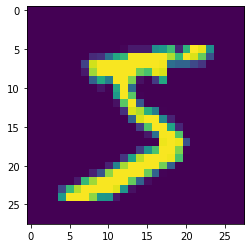

In [4]:
plt.imshow(training_data[0][0][0])

In [5]:
#Define the Neural architecture (format is taken form pytorch documentation)

class cnn(nn.Module):

    def __init__(self):
        super(cnn, self).__init__()

        self.conv1 = nn.Conv2d(1, 16, kernel_size = 5, stride = 1)
        self.pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.conv2 = nn.Conv2d(16, 8, kernel_size = 5, stride = 1)
        
        self.ful_con1 = nn.Linear(32*4*4, 256)
        
        self.ful_con2 = nn.Linear(256, 128)
        self.ful_con3 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))

        x = x.view(-1, 32*4*4)
        
        x = F.relu(self.ful_con1(x))
        x = F.relu(self.ful_con2(x))
        x = self.ful_con3(x)
        return(x)

uda_net = cnn()


In [6]:
#shape of neural architecture
print(uda_net)

cnn(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 8, kernel_size=(5, 5), stride=(1, 1))
  (ful_con1): Linear(in_features=512, out_features=256, bias=True)
  (ful_con2): Linear(in_features=256, out_features=128, bias=True)
  (ful_con3): Linear(in_features=128, out_features=10, bias=True)
)


In [7]:
#Training loop taken from udacity exercise
def train_model(uda_net, n_epoch = 50, learning_rate = 0.01):
    #define optimizer
    optimizer = optim.SGD(uda_net.parameters(), lr=learning_rate, momentum=0.9)
    
    #define loss function
    criterion = nn.CrossEntropyLoss()

    #loop iteration as per number of epoch defined
    for epoch in range(n_epoch):
        #put neural network in training loop
        uda_net.train()
        #epoch loos set is o
        train_loss = 0.0
        #number of prections are set to 0
        train_pred = 0

        #loop will be run in epoch over traing data
        for i, data in enumerate(train_loader):
            #extract independant variables and targets from the batch
            inputs, labels = data

            #put the data on GPU device
            if torch.cuda.is_available():
                inputs, lables = inputs.cuda(), labels.cuda()
            
            #gradient of optimizer
            optimizer.zero_grad()

            #get logits from model
            outputs = uda_net(inputs)

            #calculate loss between prediction and the actual values
            loss = criterion(outputs, labels)

            #calculate loss gradient against parameters
            loss.backward()

            #Update parameters using step with optimizer
            optimizer.step()

            #preictions from outputs
            _, preds = torch.max(outputs.data, 1)
            #update preiction after each epoch
            train_pred += (preds ==labels).sum().item()
            #update loss
            train_loss += loss.item()

        #print the loss and accuracy for training model
        print(f'Epoch {epoch + 1} training accuracy: {train_pred/len(train_loader):.3f}% training loss: {train_loss/len(train_loader):.3f}')

        #Validation accuracy
        val_loss =0.0
        val_pred = 0
        uda_net.eval()
        for inputs, labels in test_loader:
            if torch.cuda.is_available():
                inputs, labels = inputs.cuda(), lables.cuda()
            
            outputs = uda_net(inputs)
            loss = criterion(outputs, labels)

            _, preds = torch.max(outputs.data, 1)
            val_pred += (preds ==labels).sum().item()
            val_loss += loss.item()

        #print loss accuracy for validation model
        print(f'Epoch {epoch + 1} validation accuracy: {val_pred/len(test_loader):.3f}% validation loss: {val_loss/len(test_loader):.3f}')


In the above code I am getting error on udacity platform but easily could run on google colab.

In [8]:
train_model(uda_net)

Epoch 1 training accuracy: 85.568% training loss: 0.456
Epoch 1 validation accuracy: 97.490% validation loss: 0.082
Epoch 2 training accuracy: 97.583% training loss: 0.077
Epoch 2 validation accuracy: 98.100% validation loss: 0.057
Epoch 3 training accuracy: 98.285% training loss: 0.054
Epoch 3 validation accuracy: 98.540% validation loss: 0.046
Epoch 4 training accuracy: 98.683% training loss: 0.042
Epoch 4 validation accuracy: 98.380% validation loss: 0.050
Epoch 5 training accuracy: 98.997% training loss: 0.032
Epoch 5 validation accuracy: 98.870% validation loss: 0.039
Epoch 6 training accuracy: 99.193% training loss: 0.026
Epoch 6 validation accuracy: 98.600% validation loss: 0.046
Epoch 7 training accuracy: 99.295% training loss: 0.023
Epoch 7 validation accuracy: 98.820% validation loss: 0.037
Epoch 8 training accuracy: 99.445% training loss: 0.017
Epoch 8 validation accuracy: 98.790% validation loss: 0.040
Epoch 9 training accuracy: 99.492% training loss: 0.015
Epoch 9 validati

In [9]:
torch.save(uda_net, "uda_net.pt")